## Draft of expanded model evaluation

This is the model evaluation we want to put in the Supplement. 

Summary of changes:

- We present scatter plots of DIC, TA, and $\Omega_A$ - all 5 years of modelled output on the same plot, instead of 5 separate plots. We present scatterplots of points differentiated both by-depth and by-region. 
- We show a range of the model evaluation metrics for years 2013-2017, including Omega
- We have added a substantial amount (n = 150) of observations. these did not result in a meaningful difference in model metrics.

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seawater
import netCDF4 as nc
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import gsw
import warnings
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)
import warnings
warnings.filterwarnings('ignore')

In [4]:
dset = 'COMB'
yr = 2013; 
fname = f'./extracted_calculated/YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2013 = pd.read_csv(fname)
yr = 2014; 
fname = f'./extracted_calculated/YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2014 = pd.read_csv(fname)
yr = 2015; 
fname = f'./extracted_calculated/YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2015 = pd.read_csv(fname)
yr = 2016; 
fname = f'./extracted_calculated/YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2016 = pd.read_csv(fname)
yr = 2017; 
fname = f'./extracted_calculated/YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2017 = pd.read_csv(fname)

MOD_2013['OmegaA'][MOD_2013['OmegaA']>1e10] = np.nan
MOD_2014['OmegaA'][MOD_2014['OmegaA']>1e10] = np.nan
MOD_2015['OmegaA'][MOD_2015['OmegaA']>1e10] = np.nan
MOD_2016['OmegaA'][MOD_2016['OmegaA']>1e10] = np.nan
MOD_2017['OmegaA'][MOD_2017['OmegaA']>1e10] = np.nan

fname = f'./extracted_calculated/OBS_COMB_MASKED_umolL.csv'
OBS = pd.read_csv(fname)
# print(OBS)

In [5]:
ub = MOD_2013['ub_loc'][:]
lb = MOD_2013['lb_loc'][:]
print(np.size(np.where(np.isnan(lb))))
dic13 = MOD_2013['dic'][:]
print(np.size(np.where(np.isnan(lb)))+np.size(np.where(np.isnan(ub))))
print(np.size(np.where(np.isnan(dic13))))

ub = MOD_2014['ub_loc'][:]
print(np.size(np.where(np.isnan(lb))))
lb = MOD_2014['lb_loc'][:]
print(np.size(np.where(np.isnan(lb))))
dic13 = MOD_2014['dic'][:]
print(np.size(np.where(np.isnan(lb)))+np.size(np.where(np.isnan(ub))))
print(np.size(np.where(np.isnan(dic13))))



77
113
113
77
82
136
136


## [A] - scatter plots

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


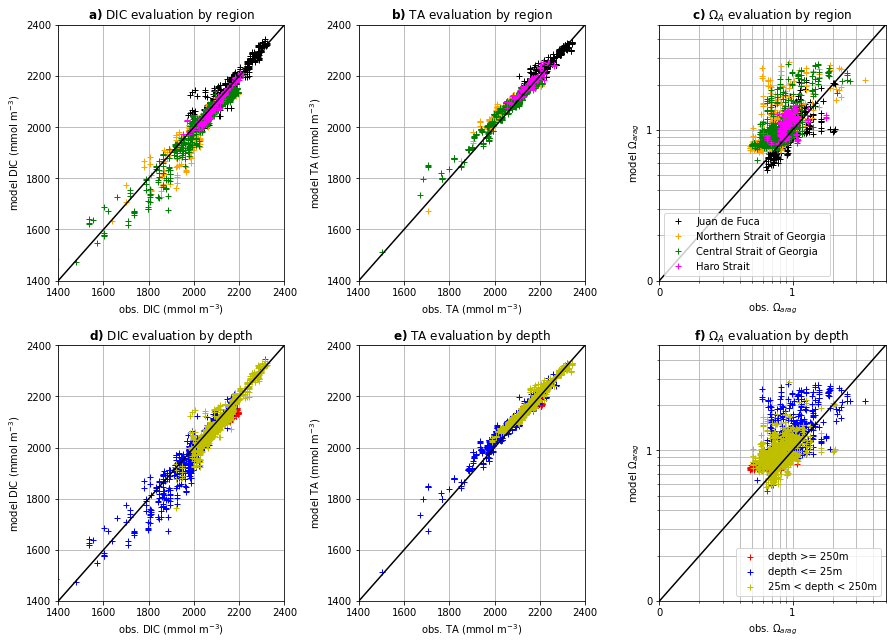

In [22]:
import matplotlib.ticker as mticker
plt.rcParams.update({'font.size': 10})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 10}


yrs = np.arange(2013,2018,1)
fact = 0.5

evaled = ['dic','alk','OmegaA']
reglabs = ['Juan de Fuca','Northern Strait of Georgia','Central Strait of Georgia','Haro Strait',]
reg_cols = ['k', 'orange','green', 'fuchsia',  ]
fig, axs = plt.subplots(2,3, figsize=(25*fact, 18.1*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,3):
    for c in range(1,5):
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2013[evaled[i]][OBS["loc_tag"] == c],\
                   color = reg_cols[c-1], marker = '+', label = reglabs[c-1],linestyle = '')
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2014[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2015[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2016[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2017[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])
#         print(np.size(OBS[evaled[i]][OBS["loc_tag"] == c]))
    axs[2].legend(ncol =1,loc = 'best')

for i in range(0,3):
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] >= 250],MOD_2013[evaled[i]][OBS["P"] >= 250],\
               marker = '+', linestyle = '', color = 'r', label = 'depth >= 250m')#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] >= 250],MOD_2014[evaled[i]][OBS["P"] >= 250],\
           marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] >= 250],MOD_2015[evaled[i]][OBS["P"] >= 250],\
       marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] >= 250],MOD_2016[evaled[i]][OBS["P"] >= 250],\
   marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] >= 250],MOD_2017[evaled[i]][OBS["P"] >= 250],\
        marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] <= 25],MOD_2013[evaled[i]][OBS["P"] <= 25],\
               marker = '+', linestyle = '', color = 'b', label = 'depth <= 25m ' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] <= 25],MOD_2014[evaled[i]][OBS["P"] <= 25],\
           marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] <= 25],MOD_2015[evaled[i]][OBS["P"] < 25],\
       marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] <= 25],MOD_2016[evaled[i]][OBS["P"] < 25],\
       marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] <= 25],MOD_2017[evaled[i]][OBS["P"] < 25],\
       marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    
    tm  = (OBS["P"] > 25) & (OBS["P"] < 250) 
    axs[i+3].plot(OBS[evaled[i]][tm],MOD_2013[evaled[i]][tm],\
               marker = '+', linestyle = '', color = 'y', label = '25m < depth < 250m')#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][tm],MOD_2014[evaled[i]][tm],\
           marker = '+', linestyle = '', color = 'y')#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][tm],MOD_2015[evaled[i]][tm],\
           marker = '+', linestyle = '', color = 'y')#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][tm],MOD_2016[evaled[i]][tm],\
           marker = '+', linestyle = '', color = 'y')#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][tm],MOD_2017[evaled[i]][tm],\
           marker = '+', linestyle = '', color = 'y')#label = reglabs[c-1])

    axs[5].legend(ncol =1,loc = 'best')
    
tits = [r'$\bf{a)}$ DIC evaluation by region', 
        r'$\bf{b)}$ TA evaluation by region',\
       r'$\bf{c)}$ $\Omega_A$ evaluation by region',
        r'$\bf{d)}$ DIC evaluation by depth',
       r'$\bf{e)}$ TA evaluation by depth',
        r'$\bf{f)}$ $\Omega_A$ evaluation by depth ']
xlab = ['obs. DIC (mmol m$^{-3}$)', 'obs. TA (mmol m$^{-3}$)', 'obs. $\Omega_{arag}$',
        'obs. DIC (mmol m$^{-3}$)', 'obs. TA (mmol m$^{-3}$)', 'obs. $\Omega_{arag}$',]
ylab = ['model DIC (mmol m$^{-3}$)', 'model TA (mmol m$^{-3}$)', 'model $\Omega_{arag}$',
        'model DIC (mmol m$^{-3}$)', 'model TA (mmol m$^{-3}$)', 'model $\Omega_{arag}$',]

for i in range(0,6):
    axs[i].grid()
    axs[i].set_xlim([1400,2400])
    axs[i].set_ylim([1400,2400])
    axs[i].plot([1000,2400],[1000,2400],'k-')
    axs[i].set_title(tits[i])
    axs[i].set_xlabel(xlab[i])
    axs[i].set_ylabel(ylab[i])
    
    
# axs[0].set_title(r"$\bf{a)}$ DIC evaluation"
#            "\n"  # Newline: the backslash is interpreted as usual
#            r"selected $\Omega_{arag}$ thresholds - preindustrial", fontsize = fs)
    
axs[2].set_xlim([0.1,5])
axs[2].set_ylim([0.1,5])
axs[2].plot([0.1,5],[0.1,5],'k-')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
axs[2].grid()
#axs[2].xaxis.set_minor_formatter(mticker.ScalarFormatter())

# axs[2].set_major_formatter(ScalarFormatter())
# axs[2].set_minor_formatter(NullFormatter())

axs[5].set_xlim([0.1,5])
axs[5].set_ylim([0.1,5])
axs[5].plot([0.1,5],[0.1,5],'k-')
axs[5].set_yscale('log')
axs[5].set_xscale('log')
#axs[5].tick_params(axis='x', rotation=45)

from matplotlib.ticker import StrMethodFormatter, NullFormatter
axs[2].yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[2].yaxis.set_minor_formatter(NullFormatter())
from matplotlib.ticker import StrMethodFormatter, NullFormatter
axs[5].yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[5].yaxis.set_minor_formatter(NullFormatter())

from matplotlib.ticker import StrMethodFormatter, NullFormatter
axs[2].xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[2].xaxis.set_minor_formatter(NullFormatter())
from matplotlib.ticker import StrMethodFormatter, NullFormatter
axs[5].xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[5].xaxis.set_minor_formatter(NullFormatter())


axs[2].grid(True, which="both", ls="-")
axs[5].grid(True, which="both", ls="-")
    
#fig.suptitle('MODEL POINTS MATCHED TO OBSERVATIONS IN SALINITY SPACE')
plt.tight_layout()
fig.savefig('./CG_FIGS/FIG_CG_02_modeval.jpg', bbox_inches='tight', dpi = 300)


# [B] noticing domain proportion 

In [7]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# print(w['gdept_1d'][0][0:21])
# print(w['gdept_1d'][0][21:30])
# print(w['gdept_1d'][0][32:40])

import pickle
csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))


print(f'proportion of domain shallower than 25m: {np.nansum(csize[0:21,:,:])/np.nansum(csize[:,:,:])}')
print(f'proportion of domain 25m-250m: {np.nansum(csize[21:32,:,:])/np.nansum(csize[:,:,:])}')
print(f'proportion of domain deeper than 250m: {np.nansum(csize[32:40,:,:])/np.nansum(csize[:,:,:])}')

print()
totobs = (np.size(MOD_2013['dic']))
totobs_25 = np.size(MOD_2013['dic'][OBS['P']<25])
totobs_mid = np.size(MOD_2013['dic'][(OBS['P']>=25) & (OBS['P']<250)])
totobs_deep = np.size(MOD_2013['dic'][ OBS['P']>=250])
print(f'total amount of observations (depth space): {totobs}')
print(f'proportion of obs shallower than 25m: {totobs_25/totobs}')
print(f'proportion of obs 25m-250m: {totobs_mid/totobs}')
print(f'proportion of obs deeper than 250m: {totobs_deep/totobs}')

proportion of domain shallower than 25m: 0.1821448334853971
proportion of domain 25m-250m: 0.7115578061828943
proportion of domain deeper than 250m: 0.106297360331708

total amount of observations (depth space): 572
proportion of obs shallower than 25m: 0.3513986013986014
proportion of obs 25m-250m: 0.5541958041958042
proportion of obs deeper than 250m: 0.0944055944055944


## calculate metrics by depth

In [8]:
def bias_box(obs,mod):
    bias = (-np.mean(obs) + np.mean(mod))
    return bias

def RMSE_box(obs,mod):
    RMSE = (np.sqrt(np.sum((mod - obs)**2) /len(obs)))
    return RMSE

def WSS_box(obs,mod):
    xbar = np.mean(obs)
    WSS = (1-(np.sum((mod - obs)**2)  / np.sum((np.abs(mod - xbar) + np.abs(obs - xbar))**2)))
    return WSS

mask_shal = OBS['P']<25
mask_mid = (OBS['P']>=25) & (OBS['P']<250)
mask_deep = (OBS['P']>=250)

tms = [mask_shal, mask_mid, mask_deep,OBS['P']<1000]
types = ['dic','alk','OmegaA']

#metric, #thing being evaluated #mask
factbox_2013 = np.zeros([3,3,4])

#evaluated criterion
for e in range(0,3):
    for m in range(0,4):
        factbox_2013[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2013[types[e]][tms[m]])
        factbox_2013[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2013[types[e]][tms[m]])
        factbox_2013[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2013[types[e]][tms[m]])

factbox_2014 = np.zeros([3,3,4])
#evaluated criterion
for e in range(0,3):
    for m in range(0,4):
        factbox_2014[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2014[types[e]][tms[m]])
        factbox_2014[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2014[types[e]][tms[m]])
        factbox_2014[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2014[types[e]][tms[m]])
#evaluated criterion
factbox_2015 = np.zeros([3,3,4])
for e in range(0,3):
    for m in range(0,4):
        factbox_2015[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2015[types[e]][tms[m]])
        factbox_2015[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2015[types[e]][tms[m]])
        factbox_2015[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2015[types[e]][tms[m]])

factbox_2016 = np.zeros([3,3,4])
#evaluated criterion
for e in range(0,3):
    for m in range(0,4):
        factbox_2016[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2016[types[e]][tms[m]])
        factbox_2016[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2016[types[e]][tms[m]])
        factbox_2016[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2016[types[e]][tms[m]])

factbox_2017 = np.zeros([3,3,4])
#evaluated criterion
for e in range(0,3):
    for m in range(0,4):
        factbox_2017[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2017[types[e]][tms[m]])
        factbox_2017[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2017[types[e]][tms[m]])
        factbox_2017[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2017[types[e]][tms[m]])
    
# print('bias with depth')
# print(factbox_2013[0,2,:])
# print(factbox_2014[0,2,:])
# print(factbox_2015[0,2,:])
# print(factbox_2016[0,2,:])
# print(factbox_2017[0,2,:])

big_factbox = np.zeros([5,3,3,4])
big_factbox[0,:,:,:] = factbox_2013
big_factbox[1,:,:,:] = factbox_2014
big_factbox[2,:,:,:] = factbox_2015
big_factbox[3,:,:,:] = factbox_2016
big_factbox[4,:,:,:] = factbox_2017

## [C] evaluation metrics - ranges

In [9]:
dic_bias_d = np.zeros(5)
dic_RMSE_d = np.zeros(5)
dic_WSS_d = np.zeros(5)
dic_stdrat_d = np.zeros(5)

# yr = 2013; 
# fname = f'./extracted_calculated/STATS_{yr}_COMB_depthspace.csv'
# STATS_2013 = pd.read_csv(fname)
# print(STATS_2013)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_depthspace.csv'
    df = pd.read_csv(fname)
    dic_bias_d[i-2013] = df['dic_bias'][0]
    dic_RMSE_d[i-2013] = df['dic_RMSE'][0]
    dic_WSS_d[i-2013] = df['dic_WSS'][0]
    dic_stdrat_d[i-2013] = df['dic_stdrat_MtoO'][0]
    
alk_bias_d = np.zeros(5)
alk_RMSE_d = np.zeros(5)
alk_WSS_d = np.zeros(5)
alk_stdrat_d = np.zeros(5)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_depthspace.csv'
    df = pd.read_csv(fname)
    alk_bias_d[i-2013] = df['alk_bias'][0]
    alk_RMSE_d[i-2013] = df['alk_RMSE'][0]
    alk_WSS_d[i-2013] = df['alk_WSS'][0]
    alk_stdrat_d[i-2013] = df['alk_stdrat_MtoO'][0]
    
OmegaA_bias_d = np.zeros(5)
OmegaA_RMSE_d = np.zeros(5)
OmegaA_WSS_d = np.zeros(5)
OmegaA_stdrat_d = np.zeros(5)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_depthspace.csv'
    df = pd.read_csv(fname)
    OmegaA_bias_d[i-2013] = df['OmegaA_bias'][0]
    OmegaA_RMSE_d[i-2013] = df['OmegaA_RMSE'][0]
    OmegaA_WSS_d[i-2013] = df['OmegaA_WSS'][0]
    OmegaA_stdrat_d[i-2013] = df['OmegaA_stdrat_MtoO'][0]
    



In [10]:
dic_bias_s = np.zeros(5)
dic_RMSE_s = np.zeros(5)
dic_WSS_s = np.zeros(5)
dic_stdrat_s = np.zeros(5)

# yr = 2013; 
# fname = f'./extracted_calculated/STATS_{yr}_COMB_salspace.csv'
# STATS_2013 = pd.read_csv(fname)
# print(STATS_2013)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_salspace.csv'
    df = pd.read_csv(fname)
    dic_bias_s[i-2013] = df['dic_bias'][0]
    dic_RMSE_s[i-2013] = df['dic_RMSE'][0]
    dic_WSS_s[i-2013] = df['dic_WSS'][0]
    dic_stdrat_s[i-2013] = df['dic_stdrat_MtoO'][0]
    
alk_bias_s = np.zeros(5)
alk_RMSE_s = np.zeros(5)
alk_WSS_s = np.zeros(5)
alk_stdrat_s = np.zeros(5)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_salspace.csv'
    df = pd.read_csv(fname)
    alk_bias_s[i-2013] = df['alk_bias'][0]
    alk_RMSE_s[i-2013] = df['alk_RMSE'][0]
    alk_WSS_s[i-2013] = df['alk_WSS'][0]
    alk_stdrat_s[i-2013] = df['alk_stdrat_MtoO'][0]
    
OmegaA_bias_s = np.zeros(5)
OmegaA_RMSE_s = np.zeros(5)
OmegaA_WSS_s = np.zeros(5)
OmegaA_stdrat_s = np.zeros(5)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_salspace.csv'
    df = pd.read_csv(fname)
    OmegaA_bias_s[i-2013] = df['OmegaA_bias'][0]
    OmegaA_RMSE_s[i-2013] = df['OmegaA_RMSE'][0]
    OmegaA_WSS_s[i-2013] = df['OmegaA_WSS'][0]
    OmegaA_stdrat_s[i-2013] = df['OmegaA_stdrat_MtoO'][0]
    

In [11]:
print('dic metrics, ranges')
print(f'dic bias max, min (by depth): {np.max(dic_bias_d)}, {np.min(dic_bias_d)}')
print(f'dic bias max, min (by sal): {np.max(dic_bias_s)}, {np.min(dic_bias_s)}')
print('')
print(f'dic RMSE max, min (by depth): {np.max(dic_RMSE_d)}, {np.min(dic_RMSE_d)}')
print(f'dic RMSE max, min (by sal): {np.max(dic_RMSE_s)}, {np.min(dic_RMSE_s)}')
print('')
print(f'dic WSS max, min (by depth): {np.max(dic_WSS_d)}, {np.min(dic_WSS_d)}')
print(f'dic WSS max, min (by sal): {np.max(dic_WSS_s)}, {np.min(dic_WSS_s)}')
print('')
print(f'dic rat. model std.dev to obs std.dev max, min (by depth): {np.max(dic_stdrat_d)}, {np.min(dic_stdrat_d)}')
print(f'dic rat. model std.dev to obs std.dev max, min (by sal): {np.max(dic_stdrat_s)}, {np.min(dic_stdrat_s)}')

dic metrics, ranges
dic bias max, min (by depth): 7.5892058701902, -4.35499055838136
dic bias max, min (by sal): -10.966694902561812, -19.129842265400384

dic RMSE max, min (by depth): 87.43718120307072, 65.9649510214151
dic RMSE max, min (by sal): 36.59378524658053, 29.270989226280022

dic WSS max, min (by depth): 0.9473595007650116, 0.9073510804434098
dic WSS max, min (by sal): 0.980519506232322, 0.9700680456678143

dic rat. model std.dev to obs std.dev max, min (by depth): 0.8864751165616744, 0.8018030765854774
dic rat. model std.dev to obs std.dev max, min (by sal): 1.0731829037423108, 1.0104602871111583


In [12]:
print('alk metrics, ranges')
print(f'alk bias max, min (by depth): {np.max(alk_bias_d)}, {np.min(alk_bias_d)}')
print(f'alk bias max, min (by sal): {np.max(alk_bias_s)}, {np.min(alk_bias_s)}')
print('')
print(f'alk RMSE max, min (by depth): {np.max(alk_RMSE_d)}, {np.min(alk_RMSE_d)}')
print(f'alk RMSE max, min (by sal): {np.max(alk_RMSE_s)}, {np.min(alk_RMSE_s)}')
print('')
print(f'alk WSS max, min (by depth): {np.max(alk_WSS_d)}, {np.min(alk_WSS_d)}')
print(f'alk WSS max, min (by sal): {np.max(alk_WSS_s)}, {np.min(alk_WSS_s)}')
print('')
print(f'alk rat. model std.dev to obs std.dev max, min (by depth): {np.max(alk_stdrat_d)}, {np.min(alk_stdrat_d)}')
print(f'alk rat. model std.dev to obs std.dev max, min (by sal): {np.max(alk_stdrat_s)}, {np.min(alk_stdrat_s)}')

alk metrics, ranges
alk bias max, min (by depth): 29.371329597621298, 26.355879414365067
alk bias max, min (by sal): 14.300984109703677, 10.137626619643925

alk RMSE max, min (by depth): 86.5336145523798, 69.26650400771649
alk RMSE max, min (by sal): 23.73957301311949, 20.796638729269

alk WSS max, min (by depth): 0.9215848281508208, 0.8634699165339672
alk WSS max, min (by sal): 0.9842314215667972, 0.9804691394680636

alk rat. model std.dev to obs std.dev max, min (by depth): 0.7798507761188725, 0.677865740767684
alk rat. model std.dev to obs std.dev max, min (by sal): 0.9238768046765468, 0.8891806071726471


In [13]:
print('OmegaA metrics, ranges')
print(f'OmegaA bias max, min (by depth): {np.max(OmegaA_bias_d)}, {np.min(OmegaA_bias_d)}')
print(f'OmegaA bias max, min (by sal): {np.max(OmegaA_bias_s)}, {np.min(OmegaA_bias_s)}')
print('')
print(f'OmegaA RMSE max, min (by depth): {np.max(OmegaA_RMSE_d)}, {np.min(OmegaA_RMSE_d)}')
print(f'OmegaA RMSE max, min (by sal): {np.max(OmegaA_RMSE_s)}, {np.min(OmegaA_RMSE_s)}')
print('')
print(f'OmegaA WSS max, min (by depth): {np.max(OmegaA_WSS_d)}, {np.min(OmegaA_WSS_d)}')
print(f'OmegaA WSS max, min (by sal): {np.max(OmegaA_WSS_s)}, {np.min(OmegaA_WSS_s)}')
print('')
print(f'OmegaA rat. model std.dev to obs std.dev max, min (by depth): {np.max(OmegaA_stdrat_d)}, {np.min(OmegaA_stdrat_d)}')
print(f'OmegaA rat. model std.dev to obs std.dev max, min (by sal): {np.max(OmegaA_stdrat_s)}, {np.min(OmegaA_stdrat_s)}')

OmegaA metrics, ranges
OmegaA bias max, min (by depth): 0.23509242229954685, 0.13839657730183774
OmegaA bias max, min (by sal): 0.2301812878764572, 0.1749300830962257

OmegaA RMSE max, min (by depth): 0.4264367407189608, 0.3264080393479466
OmegaA RMSE max, min (by sal): 0.361807878405924, 0.3079588521680668

OmegaA WSS max, min (by depth): 0.823030516863549, 0.6960110059641571
OmegaA WSS max, min (by sal): 0.7171733946061082, 0.6426603411983425

OmegaA rat. model std.dev to obs std.dev max, min (by depth): 1.1774377795513091, 0.9052811342729716
OmegaA rat. model std.dev to obs std.dev max, min (by sal): 1.4052047130717156, 1.2363409430526089


# [D] - skill metrics by depth

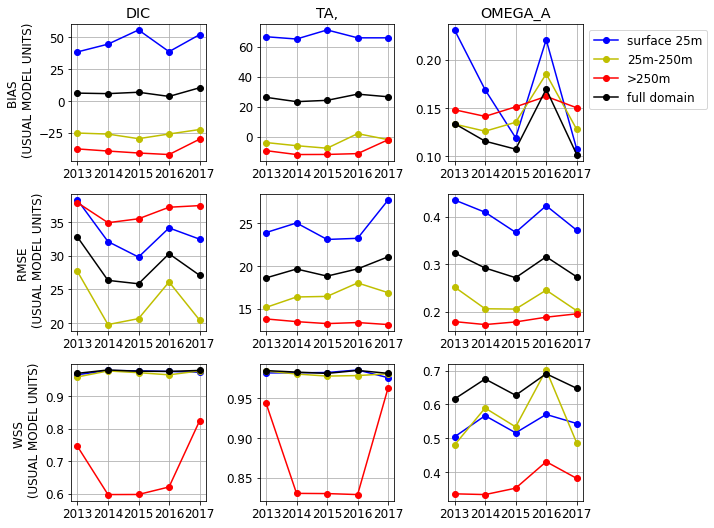

In [14]:
fig, axs = plt.subplots(3,3, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
tits = ['DIC','TA,','OMEGA_A']
#metric, #thing being evaluated #mask

count = 0
for i in range(0,3):
    axs[i].plot(np.arange(2013,2018,1),big_factbox[:,0,i,0],'bo-', label = 'surface 25m')
    axs[i].plot(np.arange(2013,2018,1),big_factbox[:,0,i,1],'yo-', label = '25m-250m')
    axs[i].plot(np.arange(2013,2018,1),big_factbox[:,0,i,2],'ro-', label = '>250m')
    axs[i].plot(np.arange(2013,2018,1),big_factbox[:,0,i,3],'ko-', label = 'full domain')
    axs[i].set_title(tits[i])
    axs[0].set_ylabel('BIAS \n (USUAL MODEL UNITS)')
for i in range(0,3):
    axs[i+3].plot(np.arange(2013,2018,1),big_factbox[:,1,i,0],'bo-')
    axs[i+3].plot(np.arange(2013,2018,1),big_factbox[:,1,i,1],'yo-')
    axs[i+3].plot(np.arange(2013,2018,1),big_factbox[:,1,i,2],'ro-')
    axs[i+3].plot(np.arange(2013,2018,1),big_factbox[:,1,i,3],'ko-')
    axs[3].set_ylabel('RMSE \n (USUAL MODEL UNITS)')
for i in range(0,3):
    axs[i+6].plot(np.arange(2013,2018,1),big_factbox[:,2,i,0],'bo-')
    axs[i+6].plot(np.arange(2013,2018,1),big_factbox[:,2,i,1],'yo-')
    axs[i+6].plot(np.arange(2013,2018,1),big_factbox[:,2,i,2],'ro-')
    axs[i+6].plot(np.arange(2013,2018,1),big_factbox[:,2,i,3],'ko-')
    axs[6].set_ylabel('WSS \n (USUAL MODEL UNITS)')
    
for i in range(0,9):
    axs[i].grid()
    axs[i].set_xticks(np.arange(2013,2018,1))
    
axs[2].legend(bbox_to_anchor = [1,1])
plt.tight_layout()

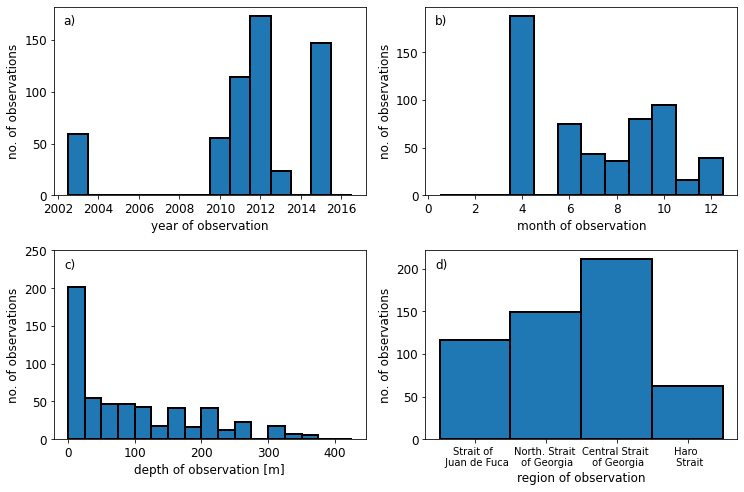

In [15]:
bins_list = np.arange(2003,2017,1)
data = OBS['crid']
#specify bin start and end points

# ax = plt.hist(data, bins = bins_list)

fact = 0.5
fig, axs = plt.subplots(2,2, figsize=(21*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

    
bins_list = np.arange(2002.5,2017,1)
data = OBS['crid']
axs[0].hist(data, bins = bins_list,  edgecolor='black', linewidth  = 2)

bins_list = np.arange(0.5,13,1)
data = OBS['mon']
axs[1].hist(data, bins = bins_list, edgecolor='black', linewidth  = 2)

bins_list = np.arange(0,450,25)
data = OBS['P']
axs[2].hist(data, bins = bins_list, edgecolor='black', linewidth  = 2)

bins_list = np.arange(0.5,5.5,1)
data = OBS['loc_tag']
axs[3].hist(data, bins = bins_list, edgecolor='black', linewidth  = 2)
axs[3].set_xticks(np.arange(1,5,1))
reglabs = ['Strait of \n Juan de Fuca','North. Strait \n of Georgia','Central Strait \n of Georgia','Haro \n Strait',]
axs[3].set_xticklabels(reglabs, fontsize = 10)

for i in range(0,4):
#     axs[i].grid(zorder=3)
    axs[i].set_ylabel('no. of observations')
    
axs[0].set_xlabel('year of observation'); axs[1].set_xlabel('month of observation')
axs[2].set_xlabel('depth of observation [m]'); axs[3].set_xlabel('region of observation')

#axs[0].text(0.1, 0.9, 'a)')
ax = axs[0]
tx = 0.07; ty= 0.925
ax.text(tx, ty, 'a)',
        verticalalignment='center', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=12)
ax = axs[1]
ax.text(tx, ty, 'b)',
        verticalalignment='center', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=12)
ax = axs[2]
ax.text(tx, ty, 'c)',
        verticalalignment='center', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=12)
ax = axs[3]
ax.text(tx, ty, 'd)',
        verticalalignment='center', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=12)
axs[2].set_ylim([0,250])
plt.tight_layout()



In [16]:
lt = OBS['loc_tag']
print(np.shape(lt[lt==1]))

(116,)


In [17]:
MOD_2016[~np.isnan(MOD_2016['dic'])]

,Unnamed: 0,dic,alk,mod_i,mod_j,lb_loc,ub_loc,OmegaA,loc_tag
0,0,2119.684814,2170.572998,264.0,422.0,29.0,30.0,0.831641,3.0
1,1,2111.428711,2165.566650,264.0,422.0,28.0,29.0,0.859782,3.0
2,2,2098.262695,2157.727539,264.0,422.0,28.0,29.0,0.898478,3.0
3,3,2087.332275,2151.219482,264.0,422.0,28.0,29.0,0.936243,3.0
4,4,2069.568359,2139.957275,264.0,422.0,27.0,28.0,0.988498,3.0
...,...,...,...,...,...,...,...,...,...
567,567,2083.734131,2138.910645,168.0,647.0,26.0,27.0,0.888435,2.0
568,568,2091.752197,2144.655273,168.0,647.0,27.0,28.0,0.870667,2.0
569,569,2110.099121,2158.736816,168.0,647.0,29.0,30.0,0.839487,2.0
570,570,2119.187500,2165.073242,168.0,647.0,30.0,31.0,0.815263,2.0
